In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\OLUSANJO\Documents\movies.csv')

In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [7]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664           NaN
7665       58750.0
7666       15000.0
7667           NaN
Name: budget, Length: 7668, dtype: float64

In [8]:
df = df.fillna('0')

In [9]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664             0
7665       58750.0
7666       15000.0
7667             0
Name: budget, Length: 7668, dtype: object

In [10]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [30]:
df.head()

name  rating  genre  year  released  score  votes  director  writer  \
5445   533       6      0  2009       697     58    926      1155    1779   
7445   535       6      0  2019       184     64    910       162     744   
3045  6896       6      6  1997       705     58    926      1155    1779   
6663  5144       6      0  2015       699     58    904      1125    2551   
7244   536       6      0  2018       193     64    909       162     744   

      star  country     budget       gross  company  runtime  
5445  2335       56  237000000  2847246203     2254       94  
7445  2242       56  356000000  2797501328     1607      112  
3045  1596       56  200000000  2201647264     2254      123  
6663   525       56  245000000  2069521700     1541       70  
7244  2242       56  321000000  2048359754     1607       81

In [12]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [13]:
pd.set_option('display.max_rows', None)

In [31]:
df.head()

name  rating  genre  year  released  score  votes  director  writer  \
5445   533       6      0  2009       697     58    926      1155    1779   
7445   535       6      0  2019       184     64    910       162     744   
3045  6896       6      6  1997       705     58    926      1155    1779   
6663  5144       6      0  2015       699     58    904      1125    2551   
7244   536       6      0  2018       193     64    909       162     744   

      star  country     budget       gross  company  runtime  
5445  2335       56  237000000  2847246203     2254       94  
7445  2242       56  356000000  2797501328     1607      112  
3045  1596       56  200000000  2201647264     2254      123  
6663   525       56  245000000  2069521700     1541       70  
7244  2242       56  321000000  2048359754     1607       81

In [15]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

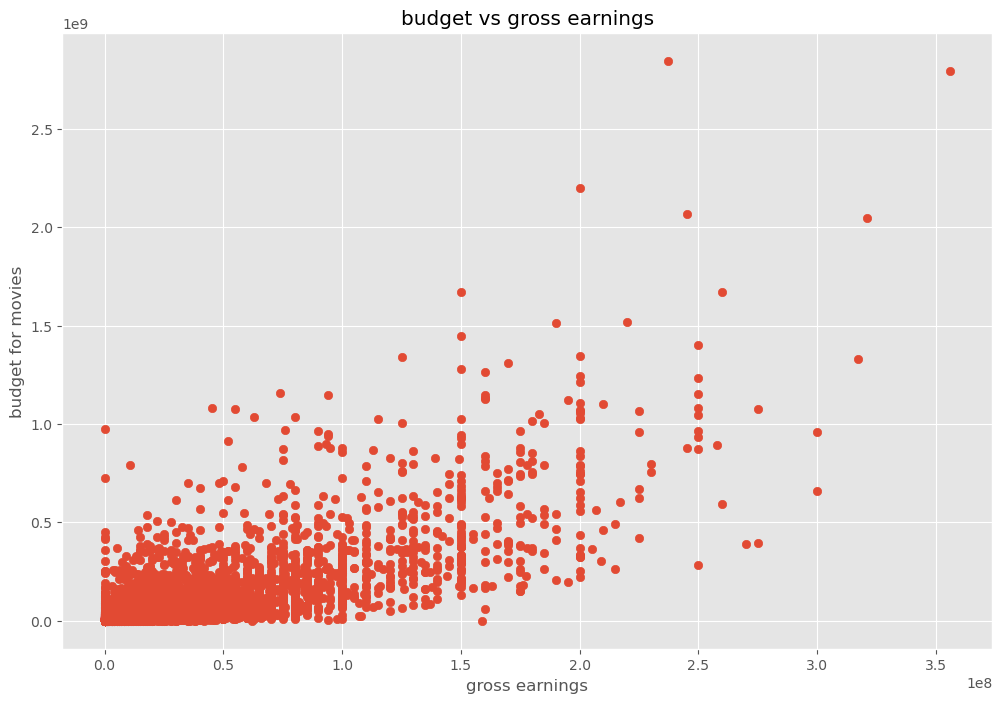

In [16]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('gross earnings')
plt.ylabel('budget for movies')
plt.show()

<Axes: xlabel='gross', ylabel='budget'>

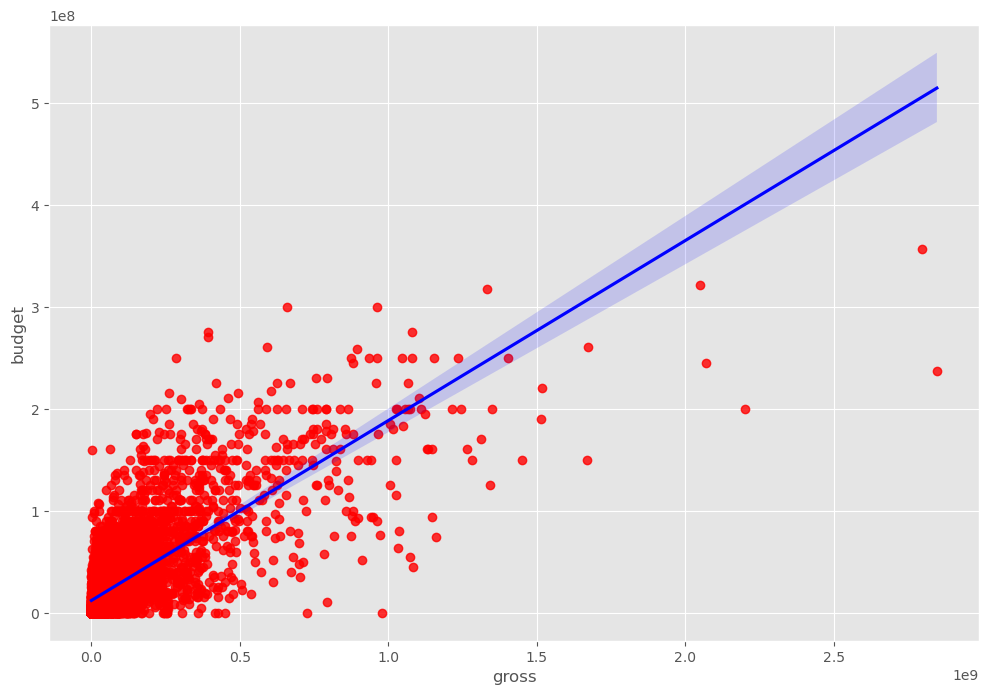

In [17]:
sns.regplot(x='gross', y='budget', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [18]:
df.corr(numeric_only=True)

year    budget     gross
year    1.000000  0.309212  0.261900
budget  0.309212  1.000000  0.750157
gross   0.261900  0.750157  1.000000

In [19]:
df.corr(numeric_only=True, method= 'spearman')

year    budget     gross
year    1.000000  0.291152  0.314681
budget  0.291152  1.000000  0.716816
gross   0.314681  0.716816  1.000000

In [21]:
correlation_matrix=df.corr(numeric_only=True, method='pearson')

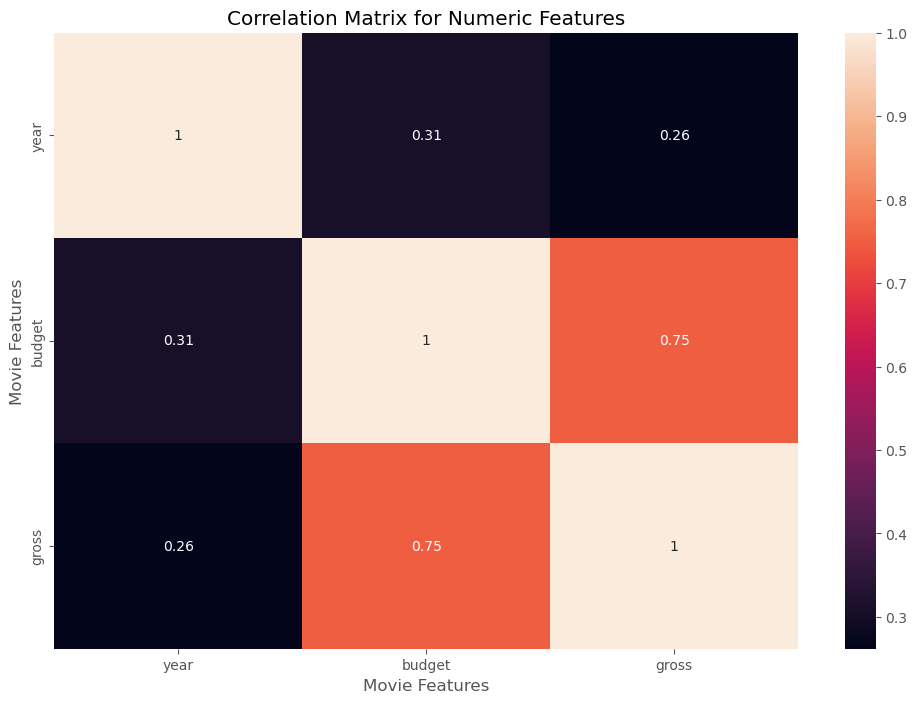

In [22]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released score      votes       director  \
5445  December 18, 2009 (United States)   7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)   8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)   7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)   7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)   8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company runtime  
5445  2847246203  Twentieth Century Fox   162.0  
7445  2797501328         Marvel Studios   181.0  
3045  2201647264  Twentieth Century Fox   194.0  
6663  2069521700              Lucasfilm   138.0  
7244  2048359754         Marvel Studios   149.0

In [24]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score  votes  director  writer  \
5445   533       6      0  2009       697     58    926      1155    1779   
7445   535       6      0  2019       184     64    910       162     744   
3045  6896       6      6  1997       705     58    926      1155    1779   
6663  5144       6      0  2015       699     58    904      1125    2551   
7244   536       6      0  2018       193     64    909       162     744   
7480  6194       5      2  2019      1489     49    549      1455    1920   
6653  2969       6      0  2015      1705     50    824       517    3569   
6043  5502       6      0  2012      2473     60    928      1517    2315   
6646  2145       6      0  2015       222     51    688      1189     707   
7494  2131       5      2  2019      2677     48    476       432    1951   
6644   534       6      0  2015      2236     53    890      1517    2315   
7247   791       6      0  2018       960     53    855      2457    3796   
5845  2407       6      1  2011      1446     61    896       679    4053   
7075  5145       6      0  2017       662     50    818      2282    3519   
7271  2970       6      0  2018      1800     42    601      1121    1094   
6262  2130       5      2  2013      2716     54    820       432    1951   
7072   657       5      7  2017      2023     51    607       250    4001   
7281  2760       5      2  2018      1730     56    589       303     492   
7055  5833       6      0  2017        62     46    541       835    1432   
6244  2823       6      0  2013      2450     51    891      2543    1175   
6688  3622       5      2  2015      1396     44    545      1639     535   
6846  1056       6      0  2016      2489     58    863       162     744   
7250   474       6      0  2018       749     49    715      1189     991   
4245  6221       6      0  2003       681     69    932      2193    1746   
7458  5084       6      0  2019      1502     55    677      1463     705   
7456  1061       6      0  2019      2214     48    770       147     256   
5878  6968       6      0  2011      1871     42    705      1886    1238   
6059  4951       6      0  2012      2805     57    845      2476    3126   
6494  6967       6      0  2014      1850     36    626      1886    1238   
2448  6194       2      2  1994      1812     65    921      2415    1703   
6047  5726       6      0  2012      1511     64    931       483    2266   
7463  5141       6      0  2019       732     45    709      1125     715   
7450  2930       7      5  2019      3063     64    925      2767    4249   
7488  6949       2      2  2019      1788     57    544      1509    2159   
5685  6948       2      2  2010      1753     62    889      1678    2159   
4852  4258       6      0  2006      1646     53    856       996    4148   
6869  4616       6      0  2016       674     58    814       912     718   
7481   290       5      1  2019      2395     49    566      1031    2079   
5860  4261       6      0  2011      2351     46    776      2341    4148   
7140  1552       5      2  2017      1897     43    447      1639     759   
2245  2967       6      0  1993      1690     61    908      2660    2932   
6908  1978       5      2  2016      1745     53    577       124     216   
3451  5138       5      0  1999      2319     45    878       963    1473   
5667   300       5      1  2010      2183     44    707      2745    2608   
6863  7504       5      2  2016      2176     60    749       362     577   
6045  6001       6      1  2012       652     58    888      2193    1360   
3843  2412       5      1  2001      2594     56    861       435    1742   
5243  5725       6      0  2008      1477     70    935       483    2266   
5652  2406       6      1  2010      2621     57    779       679    4053   
6311  1551       5      2  2013      1600     53    694      2237     759   
6905  6108       5      1  2016        73     54    590      1455    2363   
70

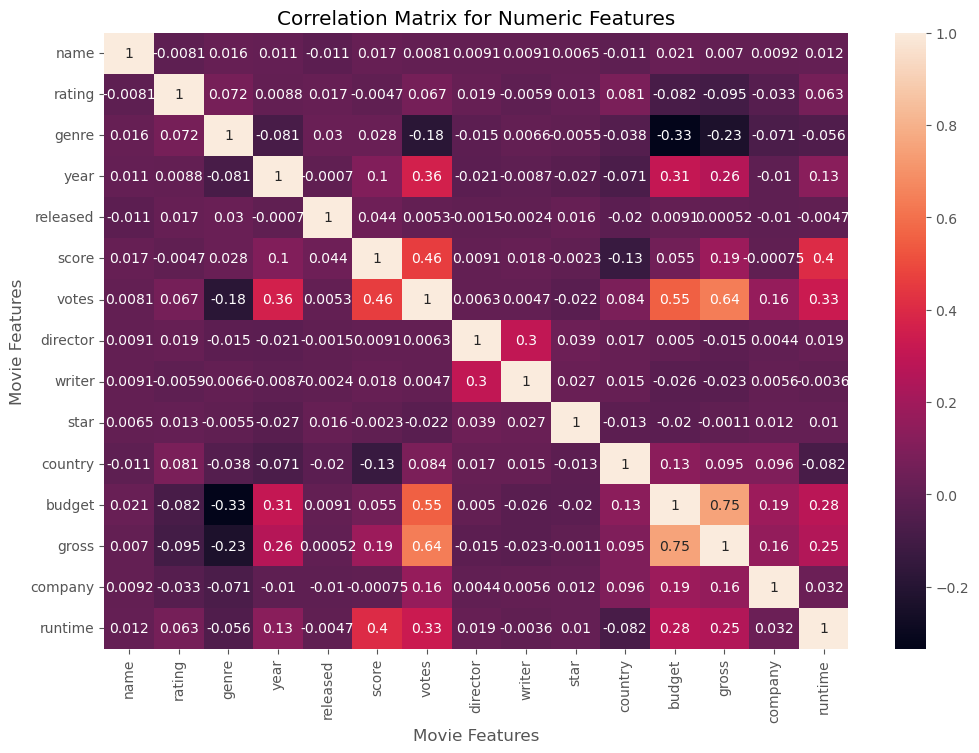

In [25]:
correlation_matrix=df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017301   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.004657   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.028053   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.099830   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.043801   
score     0.017301 -0.004657  0.028053  0.099830  0.043801  1.000000   
votes     0.008089  0.066584 -0.184691  0.359247  0.005333  0.458333   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009079   
writer    0.009081 -0.005920  0.006567 -0.008655 -0.002404  0.018088   
star      0.006472  0.013404 -0.005477 -0.027242  0.015776 -0.002349   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.132691   
budget    0.020548 -0.081939 -0.334021  0.309212  0.009145  0.054832   
gross     0.006989 -0.095450 -0.234297  0.261900  0.000519  0.185591   
company   0.009212 -0.032954 -0.071066 -0.010433 -0.010471 -0.000754   
runtime   0.012302  0.063193 -0.056361  0.129708 -0.004736  0.401611   

             votes  director    writer      star   country    budget  \
name      0.008089  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating    0.066584  0.019483 -0.005920  0.013404  0.081244 -0.081939   
genre    -0.184691 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year      0.359247 -0.020795 -0.008655 -0.027242 -0.070938  0.309212   
released  0.005333 -0.001478 -0.002404  0.015776 -0.020427  0.009145   
score     0.458333  0.009079  0.018088 -0.002349 -0.132691  0.054832   
votes     1.000000  0.006272  0.004740 -0.022467  0.084178  0.553177   
director  0.006272  1.000000  0.299067  0.039234  0.017490  0.004976   
writer    0.004740  0.299067  1.000000  0.027246  0.015342 -0.025912   
star     -0.022467  0.039234  0.027246  1.000000 -0.012999 -0.019952   
country   0.084178  0.017490  0.015342 -0.012999  1.000000  0.131720   
budget    0.553177  0.004976 -0.025912 -0.019952  0.131720  1.000000   
gross     0.635396 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company   0.164457  0.004404  0.005644  0.012437  0.095546  0.186472   
runtime   0.332489  0.018839 -0.003640  0.010282 -0.082080  0.277277   

             gross   company   runtime  
name      0.006989  0.009212  0.012302  
rating   -0.095450 -0.032954  0.063193  
genre    -0.234297 -0.071066 -0.056361  
year      0.261900 -0.010433  0.129708  
released  0.000519 -0.010471 -0.004736  
score     0.185591 -0.000754  0.401611  
votes     0.635396  0.164457  0.332489  
director -0.014916  0.004404  0.018839  
writer   -0.022997  0.005644 -0.003640  
star     -0.001129  0.012437  0.010282  
country   0.095325  0.095546 -0.082080  
budget    0.750157  0.186472  0.277277  
gross     1.000000  0.156743  0.252339  
company   0.156743  1.000000  0.032087  
runtime   0.252339  0.032087  1.000000

In [27]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017301
          votes       0.008089
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009212
          runtime     0.012302
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.004657
          votes       0.066584
          director    0.019483
          writer     -0.005920
          star        0.013404
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032954
          runtime     0.063193
genre     name        0.016355
          rating      0.072423
        

In [28]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
votes     genre      -0.184691
genre     votes      -0.184691
country   score      -0.132691
score     country    -0.132691
rating    gross      -0.095450
gross     rating     -0.095450
runtime   country    -0.082080
country   runtime    -0.082080
rating    budget     -0.081939
budget    rating     -0.081939
genre     year       -0.081261
year      genre      -0.081261
genre     company    -0.071066
company   genre      -0.071066
year      country    -0.070938
country   year       -0.070938
genre     runtime    -0.056361
runtime   genre      -0.056361
country   genre      -0.037615
genre     country    -0.037615
company   rating     -0.032954
rating    company    -0.032954
star      year       -0.027242
year      star       -0.027242
budget    writer     -0.025912
writer    budget     -0.025912
          gross      -0.022997
gross     writer     -0.022997
star    

In [29]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

budget    votes       0.553177
votes     budget      0.553177
gross     votes       0.635396
votes     gross       0.635396
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64